In [1]:
#Import Dependancies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Loading dataset
file_path = Path("crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto.head()
#df_crypto[df_crypto['IsTrading']==False].count

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#Discard all cryptocurrencies that are not being traded. 
df_crypto_new = df_crypto.loc[df_crypto['IsTrading'] != 'False'] 
#drop the `IsTrading` column from the dataframe.
df_crypto_new =  df_crypto_new.drop(['IsTrading' , 'Unnamed: 0' , 'CoinName' ], axis=1)  
df_crypto_new

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,X11,PoW/PoS,NaN,2300000000
2,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SHA-256,PoW,NaN,611000
4,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...
1247,Scrypt,PoS,1.283270e+05,1000000
1248,Scrypt,PoW/PoS,2.149121e+07,100000000
1249,Scrypt,PoW/PoS,NaN,233100000
1250,SHA-256,PoW/PoS,NaN,21000000


In [4]:
# Counting nan in dataframe
##df_crypto_new.isna().sum().sum()
#drop rows with null values
df_crypto_new = df_crypto_new.dropna(how='any',axis=0)
df_crypto_new
#df_crypto_new.isna().sum().sum()



,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000
1247,Scrypt,PoS,1.283270e+05,1000000


In [5]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero
df_crypto_new = df_crypto_new.loc[df_crypto['TotalCoinsMined'] > 0] 
df_crypto_new



,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000
1247,Scrypt,PoS,1.283270e+05,1000000


In [6]:
#features with text values, `Algorithm` and `ProofType`, into numerical data using Pandas to create dummy variables.
df_crypto_dummies = pd.get_dummies(df_crypto_new)
print(df_crypto_dummies.columns)
#no of columns increased from 4 to 395
df_crypto_dummies



Index(['TotalCoinsMined', 'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash',
       ...
       'TotalCoinSupply_91388946', 'TotalCoinSupply_92000000000',
       'TotalCoinSupply_9354000', 'TotalCoinSupply_9507271',
       'TotalCoinSupply_9736000', 'TotalCoinSupply_98000000',
       'TotalCoinSupply_98100000000', 'TotalCoinSupply_990000000000',
       'TotalCoinSupply_999481516', 'TotalCoinSupply_9999999'],
      dtype='object', length=395)


,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,1.283270e+05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
scaler = StandardScaler().fit(df_crypto_dummies)
df_crypto_scaled = scaler.transform(df_crypto_dummies)
df_crypto_scaled

array([[-0.11450078, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.09041991, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [ 0.55369883, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       ...,
       [-0.11433426, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.11449785, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.11401032, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667]])

In [8]:
# Applying PCA to reduce dimensions 
# Initialize PCA model
pca = PCA(n_components=0.99)
crypto_pca = pca.fit_transform(df_crypto_scaled)
pca_array = pca.explained_variance_ratio_
len(pca_array)
341
# Applying PCA to reduce dimensions 
# Initialize PCA model
pca = PCA(n_components=0.9)
# Get two principal components 
crypto_pca = pca.fit_transform(df_crypto_scaled)



In [9]:
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca
)
df_crypto_pca.head()



,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,288
0,-0.261333,-0.122352,2.619934e-15,-3.465133e-15,0.026839,1.605255,-0.354895,-0.001351,-1.768892,-0.378226,...,-4.444406e-01,-7.237389e-01,1.989160e+00,3.370959e+00,9.636736e-01,-3.614402e+00,-1.531263e+00,1.061587e+00,7.435951e-01,3.754505e+00
1,-0.243450,-0.123261,1.478630e-15,-2.860494e-15,0.022310,1.604416,-0.354804,-0.001201,-1.771094,-0.378647,...,1.191131e+00,4.620013e-02,1.789199e+00,1.266070e+01,-2.007254e-01,-1.958045e+00,5.820482e+00,1.050436e+00,3.444040e-01,3.888532e-01
2,0.332290,-0.030649,-1.053725e-14,5.748533e-16,-0.091428,2.491156,-0.425823,-0.439972,-1.260462,0.023074,...,1.017143e+00,2.813710e+00,-5.006806e-01,1.323562e+01,2.343552e+00,1.632992e+00,-2.461126e+00,-2.751905e+00,-1.463696e+00,-3.678970e-01
3,-0.235780,-0.198558,6.562473e-15,6.834492e-16,-0.000017,-1.605821,0.178580,-0.072748,0.188912,0.195701,...,9.018845e-16,-1.595893e-15,1.520953e-15,-4.866303e-15,-3.504577e-15,7.785922e-15,-1.992096e-15,-1.307211e-15,-1.476640e-15,-3.062758e-15
4,-0.088280,-0.202033,7.116378e-15,2.699622e-15,-0.049494,-1.586103,0.161483,-0.019558,0.314580,0.028037,...,4.170564e-17,-1.532682e-15,-2.085282e-16,4.397978e-15,-1.595241e-15,-2.168693e-15,-1.954952e-15,1.334581e-15,-3.800427e-15,-1.590028e-16


In [10]:
from sklearn.manifold import TSNE
# Initialize t-SNE model
tsne = TSNE(learning_rate=850)
# Reduce dimensions
tsne_features = tsne.fit_transform(df_crypto_pca)
tsne_features.shape



(577, 2)

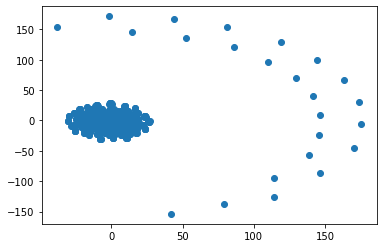

In [11]:
# Prepare to plot the dataset
# The first column of transformed features
df_crypto_pca['0'] = tsne_features[:,0]
# The second column of transformed features
df_crypto_pca['1'] = tsne_features[:,1]



# Visualize the clusters
import matplotlib.pyplot as plt
plt.scatter(df_crypto_pca['0'], df_crypto_pca['1'])
plt.show()

